In [1]:
from coffea import hist
import math
import coffea

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
import numpy as np
from itertools import chain

plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kaon_pn_4GeV_Jul21_ntuple/*.root")




In [3]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x


In [4]:
hists = {}


hists["kshort_ke"] = hist.Hist("Sim Particle",
                                hist.Bin("e", r"Kinetic Energy [MeV]", 40, 0, 3000),
                                )
hists["klong_ke"] = hist.Hist("Sim Particle",
                                hist.Bin("e", r"Kinetic Energy [MeV]", 40, 0, 3000),
                                )

In [5]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)
    
    sim_particle = ldmx_events['Sim_PNParticle']
    sim_particle_n = ldmx_events['n']['Sim_PNParticle']
    sim_particle_dau1 = ldmx_events['Sim_PNParticle_dau1']
    sim_particle_dau2 = ldmx_events['Sim_PNParticle_dau2']
    
    kshort_mask = sim_particle.pdgID == 310
    klong_mask  = sim_particle.pdgID == 130
    kplus_mask  = sim_particle.pdgID == 321
    kminus_mask = sim_particle.pdgID == -321
    kaon_mask = kshort_mask | klong_mask | kplus_mask | kminus_mask
    n_kaons = ak.sum(kaon_mask, axis = 1)
    n_kaon_mask = n_kaons == 1
    
    klong_anymask = ak.any(klong_mask, axis = 1)

    total_mask = klong_anymask & n_kaon_mask
    
    
    print(flat(flat(sim_particle[klong_mask].kine)).shape)
    print(flat(flat(sim_particle[kshort_mask].kine)).shape)
    
    hists["klong_ke"].fill(e=flat(flat(sim_particle[klong_mask].kine)))
    hists["kshort_ke"].fill(e=flat(flat(sim_particle[kshort_mask].kine)))

        

In [6]:
nchunk = 0
for chunk in ldmx_dict:
    nchunk += 1
    print('process',nchunk)
    ProcessChunk(chunk, hists)
    

process 1
(409,)
(430,)
process 2
(412,)
(430,)
process 3
(403,)
(389,)
process 4
(389,)
(364,)
process 5
(380,)
(411,)
process 6
(369,)
(379,)
process 7
(394,)
(380,)
process 8
(415,)
(394,)
process 9
(397,)
(389,)
process 10
(378,)
(394,)
process 11
(387,)
(383,)
process 12
(447,)
(358,)
process 13
(414,)
(398,)
process 14
(365,)
(393,)
process 15
(435,)
(406,)
process 16
(414,)
(368,)
process 17
(372,)
(438,)
process 18
(417,)
(389,)
process 19
(387,)
(355,)
process 20
(394,)
(426,)
process 21
(392,)
(400,)
process 22
(392,)
(390,)
process 23
(350,)
(348,)
process 24
(431,)
(406,)
process 25
(353,)
(395,)
process 26
(363,)
(414,)
process 27
(434,)
(386,)
process 28
(418,)
(367,)
process 29
(392,)
(391,)
process 30
(397,)
(362,)
process 31
(404,)
(403,)
process 32
(384,)
(378,)
process 33
(403,)
(408,)
process 34
(374,)
(410,)
process 35
(392,)
(398,)
process 36
(408,)
(435,)
process 37
(364,)
(412,)
process 38
(406,)
(397,)
process 39
(395,)
(409,)
process 40
(405,)
(411,)
process 4

process 321
(397,)
(371,)
process 322
(369,)
(383,)
process 323
(458,)
(422,)
process 324
(383,)
(398,)
process 325
(392,)
(383,)
process 326
(365,)
(359,)
process 327
(391,)
(376,)
process 328
(379,)
(450,)
process 329
(421,)
(376,)
process 330
(395,)
(402,)
process 331
(369,)
(432,)
process 332
(426,)
(362,)
process 333
(402,)
(397,)
process 334
(414,)
(391,)
process 335
(395,)
(427,)
process 336
(458,)
(386,)
process 337
(410,)
(397,)
process 338
(408,)
(438,)
process 339
(414,)
(396,)
process 340
(393,)
(393,)
process 341
(387,)
(361,)
process 342
(410,)
(370,)
process 343
(410,)
(425,)
process 344
(405,)
(391,)
process 345
(395,)
(399,)
process 346
(412,)
(410,)
process 347
(396,)
(415,)
process 348
(435,)
(392,)
process 349
(386,)
(405,)
process 350
(449,)
(397,)
process 351
(414,)
(380,)
process 352
(391,)
(389,)
process 353
(396,)
(417,)
process 354
(409,)
(442,)
process 355
(384,)
(406,)
process 356
(416,)
(404,)
process 357
(389,)
(354,)
process 358
(429,)
(404,)
process 359


<Hist (e) instance at 0x12e6bcd90>


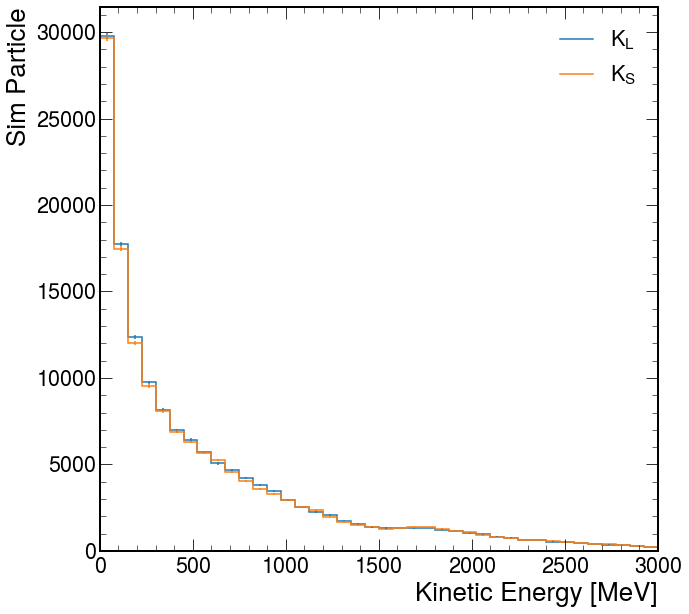

In [7]:
#print(hists["klong_ke"])
#fig, ax = plt.subplots(1,2, figsize=(24,10), constrained_layout=True)
#hist.plot1d(hists["klong_ke"],ax=ax[0],clear=False);
#leg = ax[0].legend([r'$K_L$', r'$\Lambda$', r'$n^0$', r'$\pi^-$', r'$\pi^+$',r'$p^+$',r'$\Sigma$'])

#hist.plot1d(hists["kshort_ke"],ax=ax[1],clear=False);
#leg = ax[1].legend([r'$K_L$', r'$\Lambda$', r'$n^0$', r'$\pi^-$', r'$\pi^+$',r'$p^+$',r'$\Sigma$'])


print(hists["klong_ke"])
fig, ax = plt.subplots()
hist.plot1d(hists["klong_ke"],ax=ax,clear=False);
hist.plot1d(hists["kshort_ke"],ax=ax,clear=False);
leg = ax.legend([r'$K_L$', r'$K_S$'])

#hist.plot1d(hists["kshort_ke"],ax=ax[1],clear=False);
#leg = ax[1].legend([r'$K_L$', r'$\Lambda$', r'$n^0$', r'$\pi^-$', r'$\pi^+$',r'$p^+$',r'$\Sigma$'])



(0.0, 2.0)

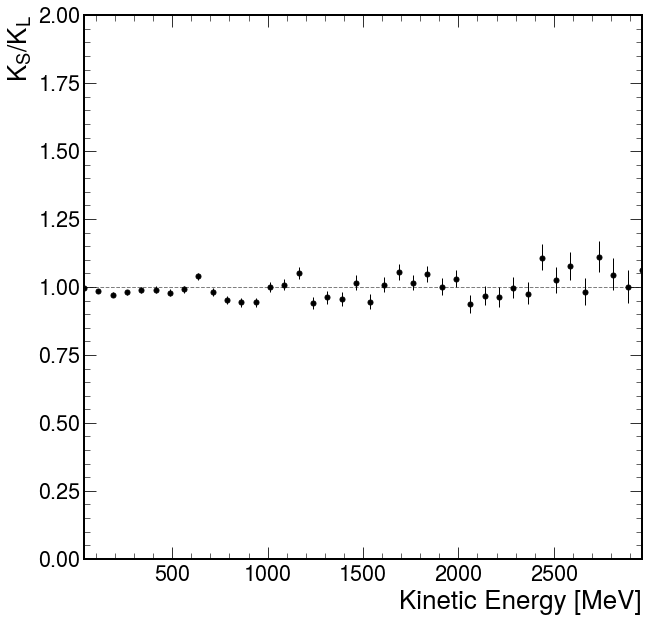

In [10]:
numerator = hists["kshort_ke"]
denominator = hists["klong_ke"]


data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}
fig, ax = plt.subplots()
hist.plotratio(num=numerator, denom=denominator,ax=ax, error_opts=data_err_opts,guide_opts={},unc='num')
ax.set_ylabel('$K_S$/$K_L$')
ax.set_ylim(0,2)
